In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous, norm, multivariate_normal, kstest, skew, kurtosis

# Задача №4

In [2]:
# класс через rv_continuous
class custom_dist(rv_continuous):
    def _pdf(self, x):
        return (3*x**2/np.sqrt(2*np.pi)) * np.exp(-0.5*(5-x**3)**2)

dist = custom_dist(name="custom")

# сэмплирование
samples1 = dist.rvs(size=10000, random_state=42)

# inverse transform ---
# теоретически: если Z ~ N(5,1), то X = Z^(1/3).
# значит можно сэмплировать напрямую:
samples2 = np.random.normal(5, 1, 10000)**(1/3)

# rejection sampling ---
N = 20000
proposal = np.random.normal(5**(1/3), 1, N)  # предложенное распределение
u = np.random.rand(N)

pdf_vals = (3*proposal**2/np.sqrt(2*np.pi)) * np.exp(-0.5*(5-proposal**3)**2)
M = pdf_vals.max()  # оценка верхней границы

accepted = proposal[u < pdf_vals/(M*norm.pdf(proposal, 5**(1/3), 1))]
samples3 = accepted[:10000]

Визуализация


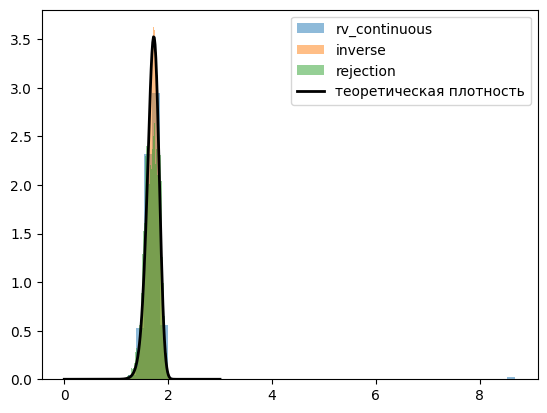

In [3]:
plt.hist(samples1, bins=50, density=True, alpha=0.5, label="rv_continuous")
plt.hist(samples2, bins=50, density=True, alpha=0.5, label="inverse")
plt.hist(samples3, bins=50, density=True, alpha=0.5, label="rejection")
xs = np.linspace(0, 3, 200)
plt.plot(xs, dist.pdf(xs), 'k-', lw=2, label="теоретическая плотность")
plt.legend()
plt.show()